In [1]:
import pandas as pd
from collections import Counter
from sklearn.decomposition import TruncatedSVD
import numpy as np
import seaborn as sns 
import string
# import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from sklearn.metrics import mean_squared_error

In [2]:
from collections import defaultdict

In [105]:
train=pd.read_csv('train/train.csv')  
test=pd.read_csv('test/test.csv')  
submission=pd.read_csv('sample_submission/sample_submission.csv')  

In [4]:
import nltk

In [5]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
# glove: https://becominghuman.ai/mathematical-introduction-to-glove-word-embedding-60f24154e54c


In [106]:
def syllables(word):
    syllable_count = 0
    vowels = 'aeiouy'
    if word[0] in vowels:
        syllable_count += 1
    for index in range(1, len(word)):
        if word[index] in vowels and word[index - 1] not in vowels:
            syllable_count += 1
    if word.endswith('e'):
        syllable_count -= 1
    if word.endswith('le') and len(word) > 2 and word[-3] not in vowels:
        syllable_count += 1
    if syllable_count == 0:
        syllable_count += 1
    return syllable_count

In [107]:
train['text_low'] = train['text'].str.lower()
train['tokenized_sents'] = train.apply(lambda raw: nltk.word_tokenize(raw['text_low']), axis=1)

group=[]
for i in train.tokenized_sents:
    group.append(" ".join(i))
train['test_all']=group

train['without_punct']=train['tokenized_sents'].apply(lambda x: [item for item in x if item not in string.punctuation])

len_all=[]
for i in train.tokenized_sents:
    len_all.append(len(i))
train['n_words']=len_all

n_words=[]
for i in train.tokenized_sents:
    res=0
    for j in i:
        res+= len(j)
    n_words.append(res)
    
train['n_character']=n_words

punct=[',','.', ';','?']
n_punct=[]
for i in train.tokenized_sents:
    res=0
    for j in i:
        if j in punct:
            res+=1
    n_punct.append(res)
    res=0
    
train['n_punct']=n_punct

train['punct_prop']=train['n_punct']/train['n_words']

punct=';'
n_punct=[]
for i in train.tokenized_sents:
    res=0
    for j in i:
        if j == punct:
            res+=1
    n_punct.append(res)
    res=0
train['semi_colon']=n_punct

punct=','
n_punct=[]
for i in train.tokenized_sents:
    res=0
    for j in i:
        if j == punct:
            res+=1
    n_punct.append(res)
    res=0
train['coma']=n_punct

punct='?'
n_punct=[]
for i in train.tokenized_sents:
    res=0
    for j in i:
        if j == punct:
            res+=1
    n_punct.append(res)
    res=0
train['interrogation']=n_punct

stop_words = set(stopwords.words('english'))
n_stop_words=[]
for i in train.tokenized_sents:
    res=0
    for j in i:
        if j in stop_words:
            res+=1
    n_stop_words.append(res)
    res=0
train['n_stop_words']=n_stop_words

train['stop_words_prop']=train['n_stop_words']/train['n_words']

n_syllabe=[]
for i in train.tokenized_sents:
    res=0
    for j in i:
        res+=syllables(j)
    n_syllabe.append(res)
    res=0
train['n_syllabe']=n_syllabe


train['pos_tags'] = train.apply(lambda row: nltk.pos_tag(row['tokenized_sents']), axis=1)

tag_count_df = pd.DataFrame(train['pos_tags'].map(lambda x: Counter(tag[1] for tag in x)).to_list())

res=pd.concat([train, tag_count_df], axis=1).fillna(0).drop(['pos_tags'], axis=1)
dropped_df = res.drop(columns = [':', ','])
train=dropped_df.iloc[:,:-27]

train['label']=train['author'].map({'EAP':2,'HPL':1, 'MWS':0})

In [108]:
test['text_low'] = test['text'].str.lower()
test['tokenized_sents'] = test.apply(lambda raw: nltk.word_tokenize(raw['text_low']), axis=1)

group=[]
for i in test.tokenized_sents:
    group.append(" ".join(i))
test['test_all']=group

test['without_punct']=test['tokenized_sents'].apply(lambda x: [item for item in x if item not in string.punctuation])

len_all=[]
for i in test.tokenized_sents:
    len_all.append(len(i))
test['n_words']=len_all

n_words=[]
for i in test.tokenized_sents:
    res=0
    for j in i:
        res+= len(j)
    n_words.append(res)
    
test['n_character']=n_words

punct=[',','.', ';','?']
n_punct=[]
for i in test.tokenized_sents:
    res=0
    for j in i:
        if j in punct:
            res+=1
    n_punct.append(res)
    res=0
    
test['n_punct']=n_punct

test['punct_prop']=test['n_punct']/test['n_words']

punct=';'
n_punct=[]
for i in test.tokenized_sents:
    res=0
    for j in i:
        if j == punct:
            res+=1
    n_punct.append(res)
    res=0
test['semi_colon']=n_punct

punct=','
n_punct=[]
for i in test.tokenized_sents:
    res=0
    for j in i:
        if j == punct:
            res+=1
    n_punct.append(res)
    res=0
test['coma']=n_punct

punct='?'
n_punct=[]
for i in test.tokenized_sents:
    res=0
    for j in i:
        if j == punct:
            res+=1
    n_punct.append(res)
    res=0
test['interrogation']=n_punct

stop_words = set(stopwords.words('english'))
n_stop_words=[]
for i in test.tokenized_sents:
    res=0
    for j in i:
        if j in stop_words:
            res+=1
    n_stop_words.append(res)
    res=0
test['n_stop_words']=n_stop_words

test['stop_words_prop']=test['n_stop_words']/test['n_words']

n_syllabe=[]
for i in test.tokenized_sents:
    res=0
    for j in i:
        res+=syllables(j)
    n_syllabe.append(res)
    res=0
test['n_syllabe']=n_syllabe


test['pos_tags'] = test.apply(lambda row: nltk.pos_tag(row['tokenized_sents']), axis=1)

tag_count_df = pd.DataFrame(test['pos_tags'].map(lambda x: Counter(tag[1] for tag in x)).to_list())

res=pd.concat([test, tag_count_df], axis=1).fillna(0).drop(['pos_tags'], axis=1)
dropped_df = res.drop(columns = [':', ','])
test=dropped_df.iloc[:,:-27]


In [109]:
train.groupby('author').count().reset_index()

,author,id,text,text_low,tokenized_sents,test_all,without_punct,n_words,n_character,n_punct,...,VBD,PRP,NNS,IN,VBG,PRP$,MD,VB,CC,label
0,EAP,7900,7900,7900,7900,7900,7900,7900,7900,7900,...,7900,7900,7900,7900,7900,7900,7900,7900,7900,7900
1,HPL,5635,5635,5635,5635,5635,5635,5635,5635,5635,...,5635,5635,5635,5635,5635,5635,5635,5635,5635,5635
2,MWS,6044,6044,6044,6044,6044,6044,6044,6044,6044,...,6044,6044,6044,6044,6044,6044,6044,6044,6044,6044


Text(0.5, 1.0, 'Number of sentences for each author')

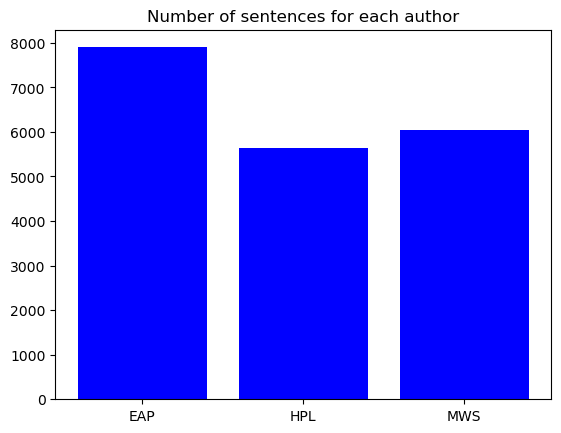

In [110]:
plt.bar(train.groupby('author').count().reset_index().author, train.groupby('author').count().reset_index().id, color='b')
plt.title('Number of sentences for each author')

In [111]:
train.groupby('author').max().reset_index().n_words

0    330
1    169
2    876
Name: n_words, dtype: int64

Text(0.5, 1.0, 'Maximum number of word for each author')

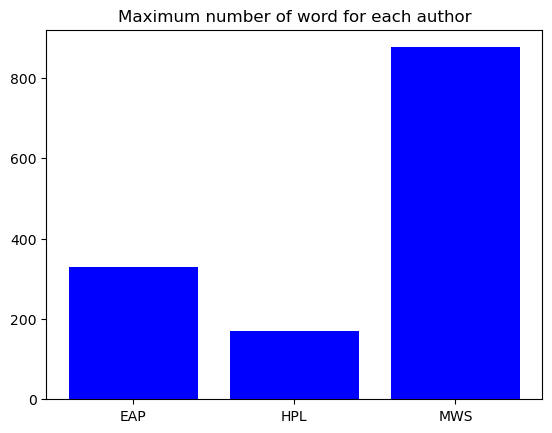

In [112]:
plt.bar(train.groupby('author').count().reset_index().author, train.groupby('author').max().reset_index().n_words, color='b')
plt.title('Maximum number of word for each author')

## ADD features a voir

In [21]:
# This row have 876 mots dans un doc donc un ohrrases
# train[(train['author']=="MWS")].test_all.values[2859:2860]

In [22]:
## Merge the text of each author and count word, compare this after.

In [23]:
merge_author=train.groupby('author')['text'].apply(' '.join).reset_index()

In [24]:
merge_author

,author,text
0,EAP,"This process, however, afforded me no means of..."
1,HPL,It never once occurred to me that the fumbling...
2,MWS,How lovely is spring As we looked from Windsor...


In [25]:
merge_author['text_low'] = merge_author['text'].str.lower()
merge_author['tokenized_sents'] = merge_author.apply(lambda raw: nltk.word_tokenize(raw['text_low']), axis=1)

In [26]:
group=[]
for i in merge_author.tokenized_sents:
    group.append(" ".join(i))

In [27]:
merge_author['test_all']=group

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
def new_feature_each_n_word(author,n=10) :  
    compare=','
    compare1=';'

    len_word=[]
    len_word_final=[]
    syllabes_ten=[]
    syllabes_ten_final=[]

    coma=0
    coma_all=[]

    point_virgule=0
    point_virgule_all=[]

    stop_word=0
    stop_words_all=[]
    
    cnt=0

    for i in list(merge_author[merge_author['author']==author].tokenized_sents.values)[0]:
        cnt+=1
        
        if len(i)>1:
            len_word.append(len(i))
            syllabes_ten.append(syllables(i))

        if i == compare:
            coma+=1

        elif i == compare1:
            point_virgule += 1

        if i in stop_words:
            stop_word+=1

        if cnt % n == 0:
            len_word_final.append(np.mean(len_word))
            syllabes_ten_final.append(np.mean(syllabes_ten))
            coma_all.append(coma)
            point_virgule_all.append(point_virgule)
            stop_words_all.append(stop_word)
            len_word=[]
            syllabes_ten=[]
            coma=0
            point_virgule=0
            stop_word=0

        
    
    len_word_final = [x for x in len_word_final if str(x) != 'nan']
    syllabes_ten_final = [x for x in syllabes_ten_final if str(x) != 'nan']
    return np.mean(len_word_final), np.mean(syllabes_ten_final), np.mean(coma_all), np.mean(point_virgule_all), np.mean(stop_words_all)

In [30]:
len_word_final_EAP, syllabes_ten_final_EAP, coma_all_EAP, point_virgule_all_EAP, stop_words_all_EAP= new_feature_each_n_word('EAP',4)
len_word_final_MWS, syllabes_ten_final_MWS, coma_all_MWS, point_virgule_all_MWS, stop_words_all_MWS= new_feature_each_n_word('MWS',4)
len_word_final_HPL, syllabes_ten_final_HPL, coma_all_HPL, point_virgule_all_HPL, stop_words_all_HPL= new_feature_each_n_word('HPL',4)

C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [31]:
len_word_final_EAP, syllabes_ten_final_EAP, coma_all_EAP, point_virgule_all_EAP, stop_words_all_EAP

(4.6051384818709415,
 1.528776647704419,
 0.30324548854685535,
 0.023337182647063894,
 1.8041331288026337)

In [32]:
len_word_final_MWS, syllabes_ten_final_MWS, coma_all_MWS, point_virgule_all_MWS, stop_words_all_MWS

(4.568393178688698,
 1.4836299120855843,
 0.2551636479186527,
 0.056392331320834654,
 1.8415422095117042)

In [33]:
len_word_final_HPL, syllabes_ten_final_HPL, coma_all_HPL, point_virgule_all_HPL, stop_words_all_HPL

(4.6666839147866215,
 1.4986680618479253,
 0.19732333800906018,
 0.02628371697288845,
 1.7337825097155473)

In [34]:
merge_author

,author,text,text_low,tokenized_sents,test_all
0,EAP,"This process, however, afforded me no means of...","this process, however, afforded me no means of...","[this, process, ,, however, ,, afforded, me, n...","this process , however , afforded me no means ..."
1,HPL,It never once occurred to me that the fumbling...,it never once occurred to me that the fumbling...,"[it, never, once, occurred, to, me, that, the,...",it never once occurred to me that the fumbling...
2,MWS,How lovely is spring As we looked from Windsor...,how lovely is spring as we looked from windsor...,"[how, lovely, is, spring, as, we, looked, from...",how lovely is spring as we looked from windsor...


In [35]:
for i in merge_author.tokenized_sents:
    print(len(i)/594850)

0.39014205261830714
0.2924283432798184
0.31742960410187443


In [36]:
232076 +173951 +188823

594850

In [37]:
vectorizer = TfidfVectorizer(lowercase=True, token_pattern=r'(?u)\b\w*[a-zA-Z]\w*\b' ,analyzer='word', stop_words='english',use_idf=False, norm=False,min_df=0.01)
input_matrix = vectorizer.fit_transform(merge_author['test_all'])
df_tfidf = pd.DataFrame(input_matrix.toarray(), columns=vectorizer.get_feature_names())

C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
df_tfidf

,aaem,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abased,...,ægyptus,æmilianus,æneid,ærial,æronaut,æronauts,ærostation,æschylus,élite,émeutes
0,1.0,1.0,2.0,0.0,7.0,11.0,2.0,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,3.0,13.0,1.0,0.0,24.0,0.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,5.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df_tfidf.iloc[0:1,np.argmax(list(df_tfidf.iloc[0:1,].values[0])):np.argmax(list(df_tfidf.iloc[0:1,].values[0]))+1].columns[0],max(list(df_tfidf.iloc[0:1,].values[0]))

('s', 410.0)

In [40]:
df_tfidf.iloc[1:2,np.argmax(list(df_tfidf.iloc[1:2,].values[0])):np.argmax(list(df_tfidf.iloc[1:2,].values[0]))+1].columns[0],max(list(df_tfidf.iloc[1:2,].values[0]))

('s', 626.0)

In [41]:
df_tfidf.iloc[2:3,np.argmax(list(df_tfidf.iloc[2:3,].values[0])):np.argmax(list(df_tfidf.iloc[2:3,].values[0]))+1].columns[0],max(list(df_tfidf.iloc[2:3,].values[0]))

('s', 352.0)

In [42]:
## T-SNE part

In [43]:
from sklearn.manifold import TSNE

In [44]:
vectorizer = TfidfVectorizer(lowercase=True, token_pattern=r'(?u)\b\w*[a-zA-Z]\w*\b' ,analyzer='word', stop_words='english',use_idf=False, norm=False,min_df=0.01)
input_matrix = vectorizer.fit_transform(train['test_all'])
df_tfidf = pd.DataFrame(input_matrix.toarray(), columns=vectorizer.get_feature_names())

C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_tfidf)

C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 19579 samples in 0.004s...
[t-SNE] Computed neighbors for 19579 samples in 1.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19579
[t-SNE] Computed conditional probabilities for sample 2000 / 19579
[t-SNE] Computed conditional probabilities for sample 3000 / 19579
[t-SNE] Computed conditional probabilities for sample 4000 / 19579
[t-SNE] Computed conditional probabilities for sample 5000 / 19579
[t-SNE] Computed conditional probabilities for sample 6000 / 19579
[t-SNE] Computed conditional probabilities for sample 7000 / 19579
[t-SNE] Computed conditional probabilities for sample 8000 / 19579
[t-SNE] Computed conditional probabilities for sample 9000 / 19579
[t-SNE] Computed conditional probabilities for sample 10000 / 19579
[t-SNE] Computed conditional probabilities for sample 11000 / 19579
[t-SNE] Computed conditional probabilities for sample 12000 / 19579
[t-SNE] Computed conditional probabilities for sa

In [46]:
train['tsne-2d-one'] = tsne_results[:,0]
train['tsne-2d-two'] = tsne_results[:,1]

In [47]:
train

,id,text,author,text_low,tokenized_sents,test_all,without_punct,n_words,n_character,n_punct,...,VBD_mean_std,PRP_mean_std,NNS_mean_std,IN_mean_std,VBG_mean_std,PRP$_mean_std,MD_mean_std,VB_mean_std,tsne-2d-one,tsne-2d-two
0,id26305,"This process, however, afforded me no means of...",EAP,"this process, however, afforded me no means of...","[this, process, ,, however, ,, afforded, me, n...","this process , however , afforded me no means ...","[this, process, however, afforded, me, no, mea...",48,191,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.174336,9.098774
1,id17569,It never once occurred to me that the fumbling...,HPL,it never once occurred to me that the fumbling...,"[it, never, once, occurred, to, me, that, the,...",it never once occurred to me that the fumbling...,"[it, never, once, occurred, to, me, that, the,...",15,58,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177499,-4.413216
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"in his left hand was a gold snuff box, from wh...","[in, his, left, hand, was, a, gold, snuff, box...","in his left hand was a gold snuff box , from w...","[in, his, left, hand, was, a, gold, snuff, box...",41,165,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.790911,2.524077
3,id27763,How lovely is spring As we looked from Windsor...,MWS,how lovely is spring as we looked from windsor...,"[how, lovely, is, spring, as, we, looked, from...",how lovely is spring as we looked from windsor...,"[how, lovely, is, spring, as, we, looked, from...",38,173,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.266328,1.752399
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"finding nothing else, not even gold, the super...","[finding, nothing, else, ,, not, even, gold, ,...","finding nothing else , not even gold , the sup...","[finding, nothing, else, not, even, gold, the,...",31,148,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177490,-4.406349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,"i could have fancied, while i looked at it, th...","[i, could, have, fancied, ,, while, i, looked,...","i could have fancied , while i looked at it , ...","[i, could, have, fancied, while, i, looked, at...",23,89,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.222739,1.403031
19575,id08973,The lids clenched themselves together as if in...,EAP,the lids clenched themselves together as if in...,"[the, lids, clenched, themselves, together, as...",the lids clenched themselves together as if in...,"[the, lids, clenched, themselves, together, as...",11,46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177870,-4.415565
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,"mais il faut agir that is to say, a frenchman ...","[mais, il, faut, agir, that, is, to, say, ,, a...","mais il faut agir that is to say , a frenchman...","[mais, il, faut, agir, that, is, to, say, a, f...",15,56,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.837643,8.873174
19577,id17513,"For an item of news like this, it strikes us i...",EAP,"for an item of news like this, it strikes us i...","[for, an, item, of, news, like, this, ,, it, s...","for an item of news like this , it strikes us ...","[for, an, item, of, news, like, this, it, stri...",18,61,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.232096,1.004265


<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

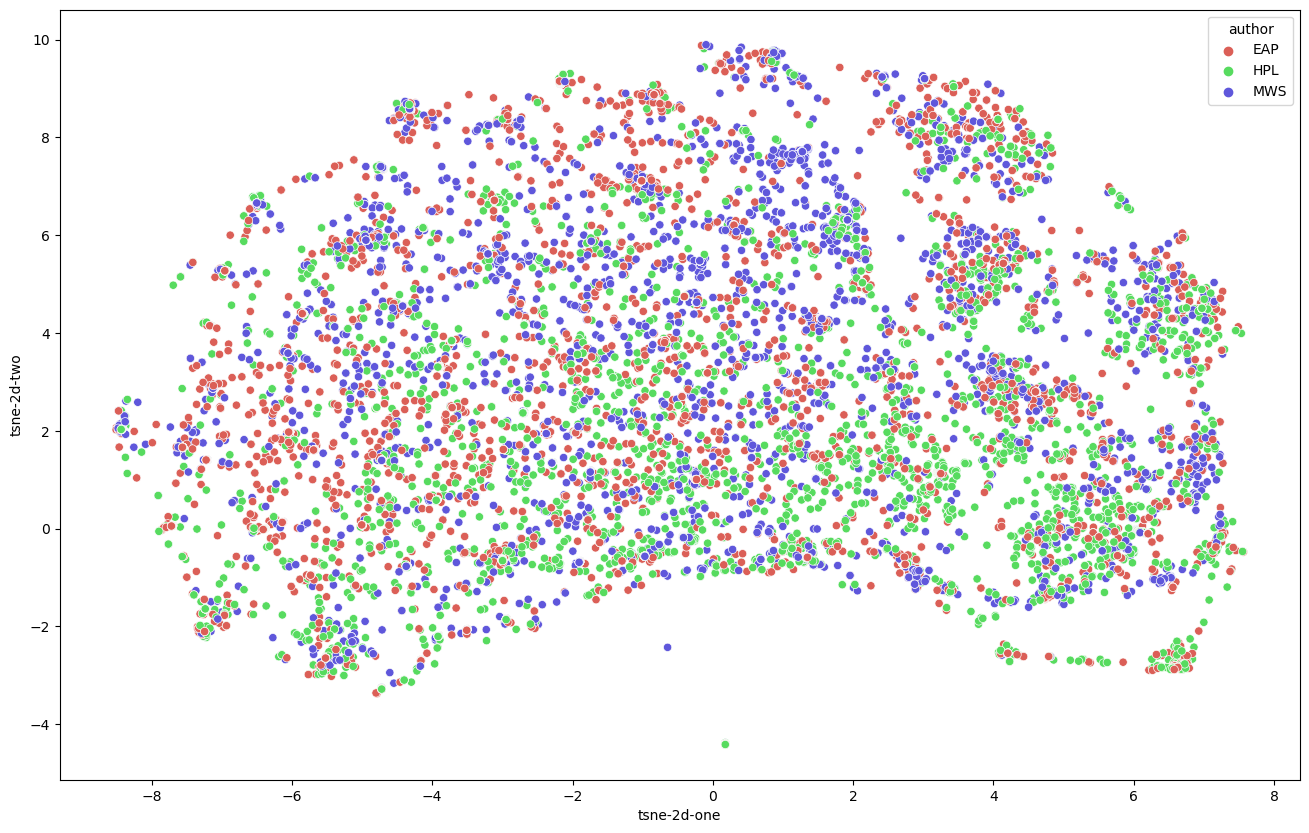

In [48]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="author",
    palette=sns.color_palette("hls", 3),
    data=train,
    legend="full"
)

In [49]:
# https://github.com/zd341/Author-Authentication/blob/main/Authorship_Authentication.ipynb
# Rajouter les noms propres les plus utilisés.

In [56]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

ModuleNotFoundError: No module named 'spacy'

In [ ]:
train['pos_tags'] = train.apply(lambda row: NER(row['text']), axis=1)

In [ ]:
def findName(author):
    all_name=[]
    all_type=[]
    all_things=dict()
    for i in list(train[train['author']==author].pos_tags):
        for word in i.ents:
            all_name.append(word.text)
            all_type.append(word.label_)
            all_things[word.text]=word.label_

    all_person=[k for k, v in all_things.items() if v == 'PERSON' or v=='ORG' or v=='NORP' or v=='LOC']
    res_all_final=[]
    for i in all_name:
        if i in all_person:
            res_all_final.append(i)
    count_all_name=Counter(res_all_final)
    return sorted(count_all_name.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
findName('HPL')

In [ ]:
findName('EAP')

In [ ]:
findName('MWS')

In [ ]:
EWhat's eMEBEDDINGS IN ml? AND AFTER EXPLAIN wORD2vEC? dOC2vEC? gLOVE? fASTtEXT AND tf6idf AND cOUNT VECTOR

## Preprocess remove punct and stop words and do phrases pre process to compute bigram:
## If 'data' 'science' will have 'data_science'

In [ ]:
# https://medium.com/@dilip.voleti/classification-using-word2vec-b1d79d375381

In [125]:
from sklearn.model_selection import train_test_split
import gensim
import re

In [126]:
stopwords_list = stopwords.words("english")

In [127]:
def clean_data(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = re.sub(r'[\\/×\^\]\[÷]', '', text)
    text = text.lower()
    final_list = [word for word in text if not word in stopwords_list]
    return text

train = train.assign(col_lemma = train.text.apply(lambda x: clean_data(x)))
train['text_with_stop_word'] = train.apply(lambda raw: nltk.word_tokenize(raw['col_lemma']), axis=1)

In [128]:
list_jsp=[]
for word in train.text_with_stop_word:
    petite_list_jsp=[]
    for i in word:
        if i not in stopwords_list:
            petite_list_jsp.append(i)
    list_jsp.append(petite_list_jsp)

In [129]:
train['tokenized_sents_final']=list_jsp

In [130]:
from gensim.models.phrases import Phrases
bigram_phrases = Phrases(train['tokenized_sents_final'], 
                         min_count=2, 
                         threshold=2)

def make_bigrams_func(text):
 
    return [bigram_phrases[doc] for doc in text]

train['Text_Tokenized_bigrams'] = make_bigrams_func(train['tokenized_sents_final'])


In [131]:
from gensim.models.phrases import Phrases
bigram_phrases = Phrases(train['text_with_stop_word'], 
                         min_count=2, 
                         threshold=2)

def make_bigrams_func(text):
 
    return [bigram_phrases[doc] for doc in text]

train['Text_Tokenized_bigrams_with_stop'] = make_bigrams_func(train['text_with_stop_word'])


In [132]:
from gensim.models.phrases import Phrases
bigram_phrases = Phrases(train['tokenized_sents'], 
                         min_count=2, 
                         threshold=2)

def make_bigrams_func(text):
 
    return [bigram_phrases[doc] for doc in text]

train['tokenized_sents_bigrams'] = make_bigrams_func(train['tokenized_sents'])


In [133]:
group=[]
for i in train.tokenized_sents_final:
    group.append(" ".join(i))
train['text_without_punct_stop']=group

In [134]:
group=[]
for i in train.tokenized_sents_bigrams:
    group.append(" ".join(i))
train['text_with_all_bigram']=group

In [135]:
stopwords_list = stopwords.words("english")

def clean_data(text):
    text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
    text = re.sub(r'[\\/×\^\]\[÷]', '', text)
    text = text.lower()
    final_list = [word for word in text if not word in stopwords_list]
    return text

test = test.assign(col_lemma = test.text.apply(lambda x: clean_data(x)))
test['text_with_stop_word'] = test.apply(lambda raw: nltk.word_tokenize(raw['col_lemma']), axis=1)

list_jsp=[]
for word in test.text_with_stop_word:
    petite_list_jsp=[]
    for i in word:
        if i not in stopwords_list:
            petite_list_jsp.append(i)
    list_jsp.append(petite_list_jsp)
    
test['tokenized_sents_final']=list_jsp

from gensim.models.phrases import Phrases
bigram_phrases = Phrases(train['tokenized_sents_final'], 
                         min_count=2, 
                         threshold=2)

def make_bigrams_func(text):
 
    return [bigram_phrases[doc] for doc in text]

test['Text_Tokenized_bigrams'] = make_bigrams_func(test['tokenized_sents_final'])

from gensim.models.phrases import Phrases
bigram_phrases = Phrases(train['text_with_stop_word'], 
                         min_count=2, 
                         threshold=2)

def make_bigrams_func(text):
 
    return [bigram_phrases[doc] for doc in text]

test['Text_Tokenized_bigrams_with_stop'] = make_bigrams_func(test['text_with_stop_word'])


from gensim.models.phrases import Phrases
bigram_phrases = Phrases(train['tokenized_sents'], 
                         min_count=2, 
                         threshold=2)

def make_bigrams_func(text):
 
    return [bigram_phrases[doc] for doc in text]

test['tokenized_sents_bigrams'] = make_bigrams_func(test['tokenized_sents'])


group=[]
for i in test.tokenized_sents_final:
    group.append(" ".join(i))
test['text_without_punct_stop']=group

group=[]
for i in test.tokenized_sents_bigrams:
    group.append(" ".join(i))
test['text_with_all_bigram']=group


## Word2Vec

In [60]:
from gensim.models import Word2Vec

In [151]:
def word2vec(data, label, vector_size=200, add_features=False, add_features_data=None):
    if add_features==False:
        model = Word2Vec(data,  min_count=1, vector_size=vector_size)
        X = [np.mean([model.wv[word] for word in sentence], axis=0) for sentence in data]
        X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)

    else:
        model = Word2Vec(data,  min_count=1, vector_size=vector_size)
        X = [np.mean([model.wv[word] for word in sentence], axis=0) for sentence in data]
        res=pd.concat([pd.DataFrame(X),add_features_data], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(res.values, label, test_size=0.2, random_state=42)

        
    return X_train, y_train, X_test, y_test
    

## FASTEXT

In [152]:
from gensim.models import FastText

In [153]:
def fast_text(data, label, min_count=5, vector_size=200, add_features=False, add_features_data=None):
    if add_features==False:
        ft_model = FastText(sentences=data,  min_count=min_count)
        X = [np.mean([ft_model.wv[word] for word in sentence], axis=0) for sentence in data]
        X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)
        
    else:
        ft_model = FastText(sentences=data,  min_count=min_count)
        X = [np.mean([ft_model.wv[word] for word in sentence], axis=0) for sentence in data]
        res=pd.concat([pd.DataFrame(X),add_features_data], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(res, label, test_size=0.2, random_state=42)
            
    return X_train, y_train, X_test, y_test

## Count Vectorizer

In [154]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [155]:
def countvector(data,label, min_df=5):
    count_vectorizer = CountVectorizer(min_df=min_df)
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=1000)
    count_vector_train = count_vectorizer.fit_transform(X_train)
    count_vector_test = count_vectorizer.transform(X_test)
    
    return count_vector_train, y_train, count_vector_test, y_test

## TD-IDF

In [156]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [157]:
def tfidf(data,label, min_df=5):
    vectorizer = TfidfVectorizer(lowercase=True, token_pattern=r'(?u)\b\w*[a-zA-Z]\w*\b' ,analyzer='word', stop_words='english',min_df=min_df)
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=1000)
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    
    return tf_idf_train, y_train, tf_idf_test, y_test

## Glove embedding:

In [158]:
# https://keras.io/examples/nlp/pretrained_word_embeddings/

In [159]:
file = open("glove.6B.100d.txt", encoding="utf8")
embeddings_dict = {}
for line in file:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [160]:
def glove_embed(data, label, add_features=False, add_features_data=None):
    if add_features==False:
        word_embeddings = np.zeros((len(data.values), 100))
        count=0
        for word in data.values:
            for i in word:
                word_embeddings[count] = embeddings_dict.get(i, np.zeros(100))
            count+=1
        X_train, X_test, y_train, y_test = train_test_split(word_embeddings, label, test_size=0.2, random_state=1000)
        
    else:
        
        word_embeddings = np.zeros((len(data.values), 100))
        count=0
        for word in data.values:
            for i in word:
                word_embeddings[count] = embeddings_dict.get(i, np.zeros(100))
            count+=1
            
        res=pd.concat([pd.DataFrame(word_embeddings),add_features_data], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(res, label, test_size=0.2, random_state=1000)        
    
    return X_train, y_train, X_test, y_test

## Doc2Vec

In [161]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn import utils
from tqdm import tqdm


In [201]:
def doc2vec(data, label, min_count=5, vector_size=200, add_features=False, add_features_data=None):
    if add_features==False:
        tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(data)]

        # Train the Doc2Vec model
        model = Doc2Vec(tagged_docs, vector_size=100, window=2, min_count=1, workers=4)

        # Extract the embeddings for the documents
        X = [model.infer_vector(list(doc.words)) for doc in tagged_docs]

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, train.label, test_size=0.2, random_state=42)
        
    else:
        tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(data)]

        # Train the Doc2Vec model
        model = Doc2Vec(tagged_docs, vector_size=100, window=2, min_count=1, workers=4)

        # Extract the embeddings for the documents
        X = [model.infer_vector(list(doc.words)) for doc in tagged_docs]
        
        res=pd.concat([pd.DataFrame(X),add_features_data], axis=1)
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(res, train.label, test_size=0.2, random_state=42)
            
    return X_train, y_train, X_test, y_test

In [ ]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_train)]
X_train_vect = np.array([np.array([d2v_model.wv[i] for i in ls if i in words])
                             for ls in X_train])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, label , test_size=0.2, random_state=1000)
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_train)]

d2v_model = Doc2Vec(documents,
                    vector_size=vector_size,
                    window=3,
                    min_count=min_count,
                    dm=1, # 0=PV-DBOW, 1=PV-DM
                    epochs=5)

words = set(d2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([d2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([d2v_model.wv[i] for i in ls if i in words])for ls in X_test])

X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(vector_size, dtype=float))

X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(vector_size, dtype=float))



## Predict exclamation

In [169]:
from keras.layers import Dense , Flatten ,Embedding,Input, Conv1D, MaxPooling1D


In [170]:
from nltk.tokenize import sent_tokenize


file = open('all_text.txt', encoding="utf8")
all_text=file.read()
all_text=sent_tokenize(all_text)

all_author=pd.DataFrame(all_text,columns=['text'])
all_author['author']=all_author.shape[0]*['all_text']

all_author['tokenized_sents'] = all_author.apply(lambda raw: nltk.word_tokenize(raw['text']), axis=1)

compare='!'
list_punct=[]
for i in all_author.tokenized_sents.values:
    cam=0
    for j in i:
        if j==compare:
            cam=1
    list_punct.append(cam)
all_author['exclamation']=list_punct


without_exclamation = all_author[all_author['exclamation']==0].sample(n = all_author.groupby('exclamation').count().reset_index().text[1:2].values[0], random_state = 44)
all_author_sample=pd.concat([without_exclamation,all_author[all_author['exclamation']==1]])


In [171]:
all_author_sample['without_punct']=all_author_sample['tokenized_sents'].apply(lambda x: [item for item in x if item != '!'])

In [172]:
group=[]
for i in all_author_sample.without_punct:
    group.append(" ".join(i))
all_author_sample['text_without_punct']=group

In [173]:
all_author_sample

,text,author,tokenized_sents,exclamation,without_punct,text_without_punct
15768,"The bent, goatish giant before him seemed like...",all_text,"[The, bent, ,, goatish, giant, before, him, se...",0,"[The, bent, ,, goatish, giant, before, him, se...","The bent , goatish giant before him seemed lik..."
11953,Cavalier was acquitted.,all_text,"[Cavalier, was, acquitted, .]",0,"[Cavalier, was, acquitted, .]",Cavalier was acquitted .
10284,"As long as it is for the magistrate, I can't.”...",all_text,"[As, long, as, it, is, for, the, magistrate, ,...",0,"[As, long, as, it, is, for, the, magistrate, ,...","As long as it is for the magistrate , I can't...."
16256,"It was not a matter of old legendry at all, bu...",all_text,"[It, was, not, a, matter, of, old, legendry, a...",0,"[It, was, not, a, matter, of, old, legendry, a...","It was not a matter of old legendry at all , b..."
13072,"The barometers mark twelve hundred metres, the...",all_text,"[The, barometers, mark, twelve, hundred, metre...",0,"[The, barometers, mark, twelve, hundred, metre...","The barometers mark twelve hundred metres , th..."
...,...,...,...,...,...,...
19016,"mysterious, ill-visaged friend of weak humanity!",all_text,"[mysterious, ,, ill-visaged, friend, of, weak,...",1,"[mysterious, ,, ill-visaged, friend, of, weak,...","mysterious , ill-visaged friend of weak humanity"
19018,"Oh, for the peace of the grave!",all_text,"[Oh, ,, for, the, peace, of, the, grave, !]",1,"[Oh, ,, for, the, peace, of, the, grave]","Oh , for the peace of the grave"
19019,the deep silence of the iron-bound tomb!,all_text,"[the, deep, silence, of, the, iron-bound, tomb...",1,"[the, deep, silence, of, the, iron-bound, tomb]",the deep silence of the iron-bound tomb
19020,"that thought would cease to work in my brain, ...",all_text,"[that, thought, would, cease, to, work, in, my...",1,"[that, thought, would, cease, to, work, in, my...","that thought would cease to work in my brain ,..."


In [174]:
import tensorflow as tf

In [175]:
# X_train, y_train, X_test, y_test= countvector(all_author_sample['text_without_punct'], all_author_sample.exclamation)
# X_train, y_train, X_test, y_test= tfidf(all_author['text_without_punct'], all_author.exclamation)


In [176]:
## LSTM

In [177]:
# model = Sequential()
# model.add(Embedding(5000, 300, input_length=X_train.toarray().shape[1]))
# model.add(LSTM(100, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(100))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))
# # model.add(LSTM(100))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [178]:
# model.fit(X_train.toarray(), np.array(y_train), epochs=3)

In [179]:
# test_loss, test_acc = model.evaluate(X_test.toarray(), y_test)
# test_loss, test_acc

In [180]:
## CNN

In [181]:
count_vectorizer = CountVectorizer(min_df=5)
X_train, X_test, y_train, y_test = train_test_split(all_author_sample['text_without_punct'],  all_author_sample.exclamation, test_size=0.2, random_state=1000)
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

In [182]:
model = tf.keras.Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=X_train.toarray().shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [183]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [184]:
history_rnn = model.fit(X_train.toarray(), np.array(tf.keras.utils.to_categorical(y_train)), epochs=5, batch_size=32,validation_data=(X_test.toarray(), np.array(tf.keras.utils.to_categorical(y_test))))

Epoch 1/5
91/91 [==============================] - 6s 53ms/step - loss: 0.6590 - accuracy: 0.6015 - val_loss: 0.6066 - val_accuracy: 0.6971
Epoch 2/5
91/91 [==============================] - 5s 53ms/step - loss: 0.5148 - accuracy: 0.7565 - val_loss: 0.5990 - val_accuracy: 0.7165
Epoch 3/5
91/91 [==============================] - 5s 58ms/step - loss: 0.4351 - accuracy: 0.7980 - val_loss: 0.6568 - val_accuracy: 0.7040
Epoch 4/5
91/91 [==============================] - 5s 50ms/step - loss: 0.3954 - accuracy: 0.8194 - val_loss: 0.7006 - val_accuracy: 0.7040
Epoch 5/5
91/91 [==============================] - 5s 51ms/step - loss: 0.3677 - accuracy: 0.8354 - val_loss: 0.7172 - val_accuracy: 0.7137


In [185]:
test_loss, test_acc = model.evaluate(X_test.toarray(), tf.keras.utils.to_categorical(y_test))

23/23 [==============================] - 0s 14ms/step - loss: 0.7172 - accuracy: 0.7137


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


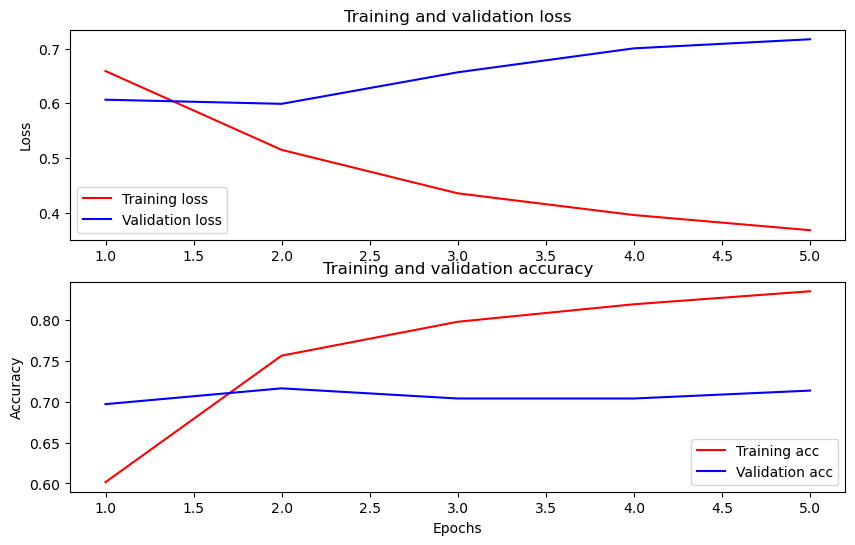

In [186]:
history_dict = history_rnn.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [187]:
y_pred=model.predict(X_test.toarray())

23/23 [==============================] - 1s 18ms/step


In [188]:
y_pred=list(np.argmax(y_pred, axis=1))

In [189]:
mean_squared_error(y_test, y_pred)

0.2863070539419087

In [190]:
train_data_exclamation=count_vectorizer.transform(train['text'])
exclamation_train = model.predict(train_data_exclamation.toarray())
train['exclamation']=np.argmax(exclamation_train,axis=1)
train['text_token_exclamation'] = train.apply(lambda raw: nltk.word_tokenize(raw['text']), axis=1)
without_mark=train[train['exclamation']==1].text_token_exclamation.apply(lambda x: [item for item in x if item != '.'])
for i in without_mark:
    i.insert(len(i),'!')
train.loc[train['exclamation']==1,'text_token_exclamation']=without_mark


group=[]
for i in train.text_token_exclamation:
    group.append(" ".join(i))
train['text_exclamation']=group

612/612 [==============================] - 8s 13ms/step


In [109]:
test_data_exclamation=count_vectorizer.transform(test['text'])
exclamation_test = model.predict(test_data_exclamation.toarray())
test['exclamation']=np.argmax(exclamation_test,axis=1)
test['text_token_exclamation'] = test.apply(lambda raw: nltk.word_tokenize(raw['text']), axis=1)
without_mark=test[test['exclamation']==1].text_token_exclamation.apply(lambda x: [item for item in x if item != '.'])
for i in without_mark:
    i.insert(len(i),'!')
test.loc[test['exclamation']==1,'text_token_exclamation']=without_mark

group=[]
for i in test.text_token_exclamation:
    group.append(" ".join(i))
test['text_exclamation']=group

263/263 [==============================] - 5s 20ms/step


## BERT

In [110]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

In [111]:
import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [112]:
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

In [113]:
### You maybe need to download this package if you don't havz

In [114]:
# pip install tensorflow-hub

In [115]:
# pip install -q -U tensorflow-text

In [116]:
# pip install -q -U tf-models-official

In [117]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [118]:
def build_classifier_model():
    text_input = tensorflow.keras.layers.Input(shape=(), dtype=tensorflow.string, name='test_all')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tensorflow.keras.layers.Dropout(0.1)(net)
    net = tensorflow.keras.layers.Dense(3, activation='softmax', name='classifier_b')(net)
    return tensorflow.keras.Model(text_input, net)

In [119]:
classifier_model = build_classifier_model()

KeyboardInterrupt: 

In [ ]:
X_train, X_test = train_test_split(train, test_size=0.30, stratify=train['label'], random_state=1234)

In [ ]:
def df_to_dataset(dataframe, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('label')
    ds = tensorflow.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.batch(batch_size)
    return ds

In [ ]:
train_ds  = df_to_dataset(X_train[['test_all','label']], batch_size=32)
test_ds  = df_to_dataset(X_test[['test_all','label']], batch_size=32)

In [ ]:
epochs = 5
steps_per_epoch = tensorflow.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [ ]:
history = classifier_model.fit(x=train_ds, validation_data=test_ds, batch_size=32, epochs=3)

In [ ]:
classifier_model.evaluate(train_ds, batch_size=32)

In [ ]:
classifier_model.evaluate(test_ds, batch_size=32)

In [ ]:
for i in list(X_test['label'].values):
    if i==3:
        print(i)

In [ ]:
for i in list(all_pred):
    if i==3:
        print(i)


In [ ]:
mean_squared_error(list(X_test['label'].values), list(all_pred))

In [ ]:
classifier_model.save("mnist_model.h5")

In [ ]:
history_dict

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
### This part just appply same things than for train

In [ ]:
dep_preds = classifier_model.predict(test['test_all'].values)
dep_df = pd.DataFrame(data=dep_preds, columns=['EAP','MWS','HPL'])

In [ ]:
dep_df

## ML PART

In [73]:
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [165]:
def all_token(data, algorithme, add_features=False, add_features_data=None):
    X_train_word2vec, y_train_word2vec, X_test_word2vec, y_test_word2vec= word2vec(data,train['label'], add_features=add_features, add_features_data=add_features_data)
    X_train_glove, y_train_glove, X_test_glove, y_test_glove= glove_embed(data,train['label'], add_features=add_features, add_features_data=add_features_data)
    X_train_fasttext, y_train_fasttext, X_test_fasttext, y_test_fasttext= fast_text(data,train['label'], add_features=add_features, add_features_data=add_features_data)
    X_train_doc2vec, y_train_doc2vec, X_test_doc2vec, y_test_doc2vec = doc2vec(data,train['label'], add_features=add_features, add_features_data=add_features_data)
    
    classifier = algorithme
    classifier.fit(X_train_word2vec, y_train_word2vec)
    score = classifier.score(X_test_word2vec, y_test_word2vec)
    print('Word2Vec Accuracy is: '+str(score*100))
    
    classifier = algorithme
    classifier.fit(X_train_doc2vec, y_train_doc2vec)
    score = classifier.score(X_test_doc2vec, y_test_doc2vec)
    print('Doc2Vec Accuracy is: '+str(score*100))
    
    classifier = algorithme
    classifier.fit(X_train_glove, y_train_glove)
    score = classifier.score(X_test_glove, y_test_glove)
    print('Glove Accuracy is: '+str(score*100))
    
    classifier = algorithme
    classifier.fit(X_train_fasttext, y_train_fasttext)
    score = classifier.score(X_test_fasttext, y_test_fasttext)
    print('Fast Text Accuracy is: '+str(score*100))

In [198]:
def all_text(data, algorithme):
    X_train_countvector, y_train_countvector, X_test_countvector, y_test_countvector= countvector(data,train['label'])
    X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf= tfidf(data,train['label'])
    
    classifier = algorithme
    classifier.fit(X_train_countvector, y_train_countvector)
    score = classifier.score(X_test_countvector, y_test_countvector)
    print('CountVector Accuracy is: '+str(score*100))
    
    classifier = algorithme
    classifier.fit(X_train_tfidf, y_train_tfidf)
    score = classifier.score(X_test_tfidf, y_test_tfidf)
    print('TF-IDF Accuracy is: '+str(score*100))

In [76]:
## Logistic Regression

In [207]:
add_features=train.iloc[:,7:-12]

In [244]:
add_features['exclamation']=train['exclamation']

In [200]:
print('Texte de base')
all_token(train['text'], LogisticRegression(max_iter=1000))
all_text(train.test_all, LogisticRegression(max_iter=1000))

print('Texte sans punctuation')
all_token(train['without_punct'], LogisticRegression(max_iter=1000))
all_text(train.col_lemma, LogisticRegression(max_iter=1000))

print('Texte With-bigrams')
all_token(train['tokenized_sents_bigrams'], LogisticRegression(max_iter=1000))
all_text(train.text_with_all_bigram, LogisticRegression(max_iter=1000))

print('Texte Esclamation-mark')
all_token(train['text_token_exclamation'], LogisticRegression(max_iter=1000))
all_text(train.text_exclamation, LogisticRegression(max_iter=1000))



Texte de base
Word2Vec Accuracy is: 52.170582226761994
Doc2Vec Accuracy is: 51.608784473953015
Glove Accuracy is: 39.60674157303371
Fast Text Accuracy is: 51.813074565883554
CountVector Accuracy is: 79.67313585291113
TF-IDF Accuracy is: 78.42185903983658
Texte sans punctuation
Word2Vec Accuracy is: 60.163432073544435
Doc2Vec Accuracy is: 65.11746680286006
Glove Accuracy is: 47.625127681307454
Fast Text Accuracy is: 58.3758937691522
CountVector Accuracy is: 79.902962206333
TF-IDF Accuracy is: 78.06435137895812
Texte With-bigrams
Word2Vec Accuracy is: 50.510725229826356
Doc2Vec Accuracy is: 55.6435137895812
Glove Accuracy is: 39.60674157303371
Fast Text Accuracy is: 52.55362614913177
CountVector Accuracy is: 77.06843718079674
TF-IDF Accuracy is: 77.19611848825332
Texte Esclamation-mark
Word2Vec Accuracy is: 62.487231869254344
Doc2Vec Accuracy is: 65.52604698672114
Glove Accuracy is: 39.4535240040858
Fast Text Accuracy is: 61.03166496424923
CountVector Accuracy is: 79.67313585291113
TF-ID

TypeError: Parameter doc_words of infer_vector() must be a list of strings (not a single string).

In [209]:
print('########')
print('add_features')


print('Texte de base')
all_token(train['text'], LogisticRegression(max_iter=1000), add_features=True, add_features_data=add_features)

print('Texte sans punctuation')
all_token(train['without_punct'], LogisticRegression(max_iter=1000), add_features=True, add_features_data=add_features)

print('Texte With-bigrams')
all_token(train['tokenized_sents_bigrams'], LogisticRegression(max_iter=1000), add_features=True, add_features_data=add_features)

print('Texte Esclamation-mark')
all_token(train['text_token_exclamation'], LogisticRegression(max_iter=1000), add_features=True, add_features_data=add_features)


########
add_features
Texte de base


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Word2Vec Accuracy is: 60.291113381001026


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

Doc2Vec Accuracy is: 60.95505617977528


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

Glove Accuracy is: 58.656792645556685


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fast Text Accuracy is: 60.39325842696629
Texte sans punctuation


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Word2Vec Accuracy is: 62.2829417773238


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

Doc2Vec Accuracy is: 65.65372829417774


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

Glove Accuracy is: 61.28702757916241


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fast Text Accuracy is: 61.97650663942799
Texte With-bigrams


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Word2Vec Accuracy is: 59.065372829417775


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

Doc2Vec Accuracy is: 61.057201225740556


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

Glove Accuracy is: 58.47803881511746


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fast Text Accuracy is: 59.269662921348306
Texte Esclamation-mark


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Word2Vec Accuracy is: 63.02349336057201


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

Doc2Vec Accuracy is: 66.26659856996936


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int

Glove Accuracy is: 58.350357507660874
Fast Text Accuracy is: 62.64044943820225


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [140]:
X_train_word2vec, y_train_word2vec, X_test_word2vec, y_test_word2vec= word2vec(train.text,train['label'], add_features=True, add_features_data=add_features)

In [141]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_word2vec, y_train_word2vec)
score = classifier.score(X_test_word2vec, y_test_word2vec)
print('Word2Vec Accuracy is: '+str(score*100))

Word2Vec Accuracy is: 60.13789581205311


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random_forest

In [ ]:
print('Texte de base')
all_token(train['text'], RandomForestClassifier())
all_text(train.test_all,RandomForestClassifier())

print('Texte sans punctuation')
all_token(train['without_punct'],RandomForestClassifier())
all_text(train.col_lemma,RandomForestClassifier())

print('Texte With-bigrams')
all_token(train['tokenized_sents_bigrams'], RandomForestClassifier())
all_text(train.text_with_all_bigram, RandomForestClassifier())

print('Texte Esclamation-mark')
all_token(train['text_token_exclamation'], RandomForestClassifier())
all_text(train.text_exclamation, RandomForestClassifier())



In [246]:
X_train_doc2vec, y_train_doc2vec, X_test_doc2vec, y_test_doc2vec = doc2vec(train['text_token_exclamation'],train['label'], add_features=True, add_features_data=add_features)

In [247]:
classifier = RandomForestClassifier()
classifier.fit(X_train_doc2vec, y_train_doc2vec)
score = classifier.score(X_test_doc2vec, y_test_doc2vec)
print('Doc2Vec Accuracy is: '+str(score*100))

C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Doc2Vec Accuracy is: 63.48314606741573


C:\Users\rugby\anaconda3\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [248]:
sorted_idx = classifier.feature_importances_.argsort()

In [249]:
list_feature=[]
list_feature_value=[]
count=0
for i in X_train_doc2vec.columns[sorted_idx]:
    if i in add_features.columns:
        list_feature_value.append(classifier.feature_importances_[sorted_idx][count])
        list_feature.append(i)
    count+=1
        

Text(0.5, 0, 'Random Forest Feature Importance')

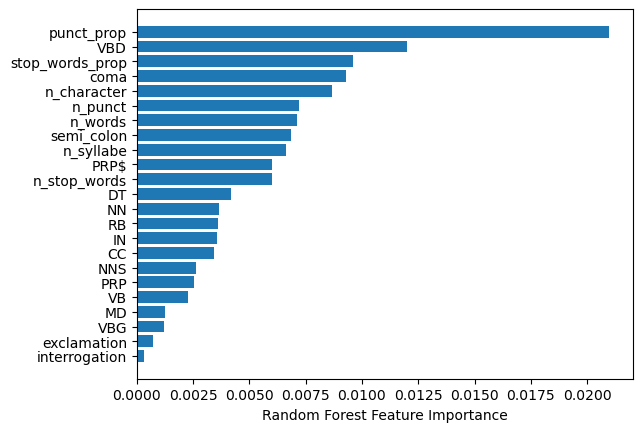

In [250]:
plt.barh(list_feature,list_feature_value)
plt.xlabel("Random Forest Feature Importance")

In [ ]:
# SVM

In [ ]:
print('Texte de base')
all_token(train['text'], svm.SVC())
all_text(train.test_all, svm.SVC())

print('Texte sans punctuation')
all_token(train['without_punct'], svm.SVC())
all_text(train.col_lemma, svm.SVC())

print('Texte With-bigrams')
all_token(train['tokenized_sents_bigrams'], svm.SVC())
all_text(train.text_with_all_bigram, svm.SVC())

print('Texte Esclamation-mark')
all_token(train['text_token_exclamation'], svm.SVC())
all_text(train.text_exclamation, svm.SVC())

